In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC


In [4]:
data = pd.read_csv('D:\SunBase Data Intern\customer_churn_large_dataset.csv')
data = data.drop(columns=['Name', 'CustomerID'])
data.head()
data = pd.DataFrame(data)
print(data.shape)
data.head()

(100000, 7)


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


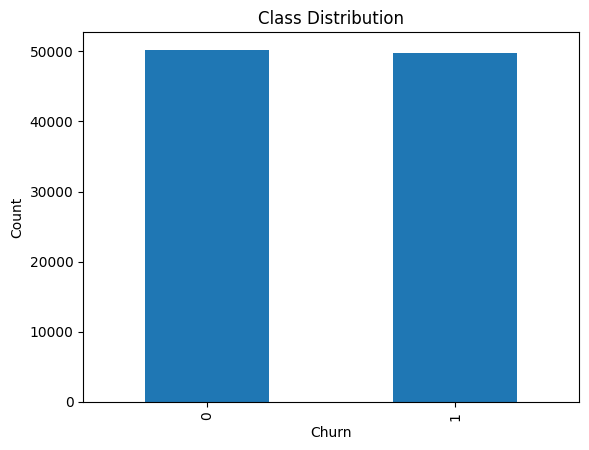

NameError: name 'compute_class_weight' is not defined

In [5]:
data.isnull().sum()

data['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

class_weights = compute_class_weight('balanced', classes=[0, 1], y=data['Churn'])
print("Imbalance Ratio:", imbalance_ratio)
print("Class Weights:", class_weights)


In [6]:
csv_X = data.drop('Churn', axis=1)
csv_X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266


In [7]:
# X = data.drop(columns=['Churn'])
csv_y = data['Churn']
# X.head()
csv_y.head()


0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [8]:
# Encoding the categorical data
# unique = X['Location'].unique()
# print(uniqe)

X = pd.DataFrame(csv_X)
y = pd.DataFrame(csv_y).values.ravel()
print(X.shape)
print(y.shape)
# y.head()

# Performing one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Gender', 'Location'])
# X_encoded.head()

(100000, 6)
(100000,)


##### 

In [9]:
# Creat the model
model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

In [10]:
# Perform cross-validation
num_folds = 20  # Number of cross-validation folds
scores = cross_val_score(model, X_encoded, y, cv=num_folds, scoring='accuracy')

# Print the cross-validation scores
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean Accuracy = {mean_score:.2f}")
print(f"Standard Deviation = {std_score:.2f}")

Fold 1: Accuracy = 0.49
Fold 2: Accuracy = 0.50
Fold 3: Accuracy = 0.50
Fold 4: Accuracy = 0.50
Fold 5: Accuracy = 0.51
Fold 6: Accuracy = 0.50
Fold 7: Accuracy = 0.49
Fold 8: Accuracy = 0.51
Fold 9: Accuracy = 0.51
Fold 10: Accuracy = 0.50
Fold 11: Accuracy = 0.50
Fold 12: Accuracy = 0.50
Fold 13: Accuracy = 0.49
Fold 14: Accuracy = 0.51
Fold 15: Accuracy = 0.50
Fold 16: Accuracy = 0.50
Fold 17: Accuracy = 0.52
Fold 18: Accuracy = 0.50
Fold 19: Accuracy = 0.51
Fold 20: Accuracy = 0.51
Mean Accuracy = 0.50
Standard Deviation = 0.01
